<a href="https://colab.research.google.com/github/Gdearmascasta/Liberias-data/blob/main/Tendencia_y_Estacionalidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose


#Grafica de concentración de PM2.5 **interactiva**

In [ ]:
df["Fecha"] = pd.to_datetime(df["Fecha"])


fig = px.line(df, x="Fecha", y="PM2.5",
              title="Concentración diaria de PM2.5 en dos años",
              labels={"Fecha": "Fecha", "PM2.5": "Concentración de PM2.5 (µg/m³)"},
              line_shape="linear")

fig.update_traces(line=dict(color="darkgray"))
fig.update_layout(template="plotly_white")

fig.show()

##Conclusión:
En la gráfica de la serie de tiempo, se muestra la concentración diaria de PM2.5 a lo largo de dos años. Se pueden observar variaciones importantes con crestas y valles en distintos periodos. Sin embargo, al analizar el comportamiento de la línea, no se aprecia una tendencia marcada hacia el aumento ni hacia la disminución de los valores hasta cierto punto (hasta septiembre de 2023). A partir de esa fecha, la concentración comienza a mostrar un ascenso leve y sostenido, lo que sugiere un cambio en la tendencia general de la serie.


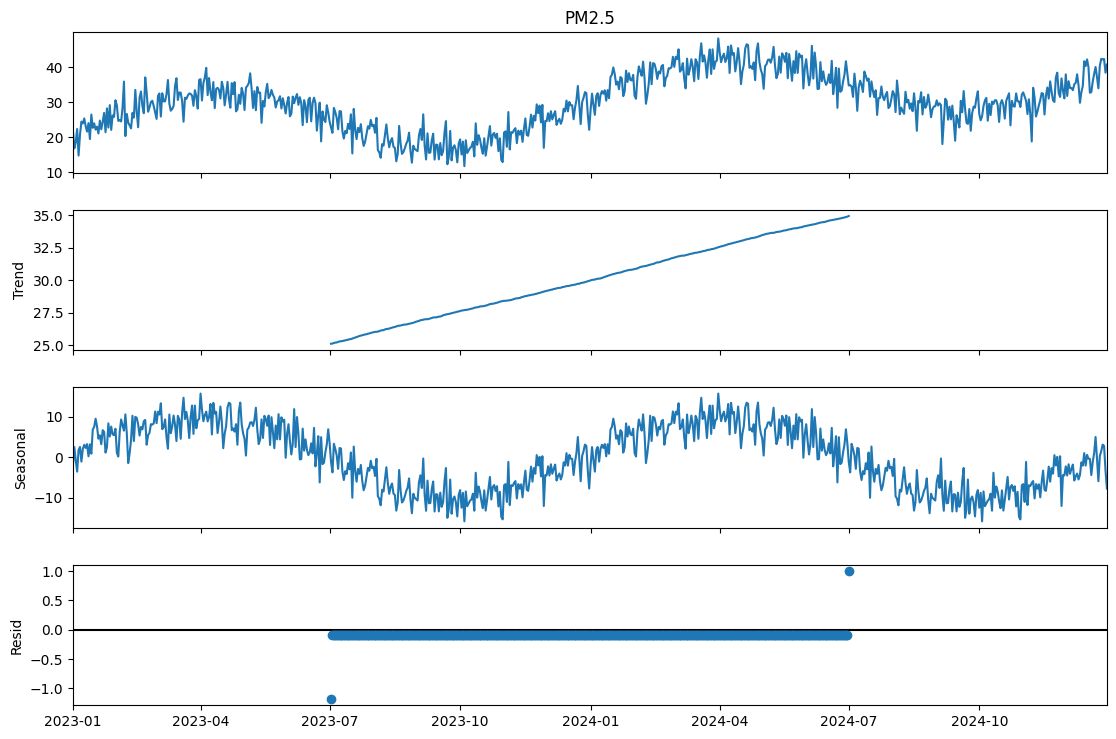

In [ ]:
fechas = pd.date_range(start="2023-01-01", periods=730, freq="D")

# Tendencia creciente simulada
tendencia = np.linspace(20, 40, 730)

# Estacionalidad anual (patrón senoidal)
estacionalidad = 10 * np.sin(2 * np.pi * fechas.dayofyear / 365)

# Ruido aleatorio
ruido = np.random.normal(0, 3, 730)

# Serie de PM2.5
pm25 = tendencia + estacionalidad + ruido

# DataFrame con índice de fechas
df = pd.DataFrame({"Fecha": fechas, "PM2.5": pm25})
df.set_index("Fecha", inplace=True)

# --- Descomposición de la serie ---
descomposicion = seasonal_decompose(df["PM2.5"], model="additive", period=365)

# --- Graficar los componentes ---
fig = descomposicion.plot()
fig.set_size_inches(12, 8)
plt.show()


Tendencia: ¿La concentración de PM2.5 se mantiene estable o cambia?

<br>R/: La concentración de PM2.5 se mantiene relativamente estable durante gran parte del periodo analizado, sin mostrar una tendencia marcada hasta septiembre de 2023. A partir de esa fecha, en la gráfica de Trend se observa un ascenso leve y sostenido, lo que indica un cambio en la tendencia general hacia valores ligeramente más altos.

<br>Estacionalidad: ¿Qué patrón se repite cada año? ¿En qué meses parece aumentar la
contaminación?

<br>R/: En el componente Seasonal se observa un patrón ondulatorio que se repite cada año. La concentración de PM2.5 tiende a aumentar en ciertos meses, alcanzando picos más altos aproximadamente entre abril y julio, y luego disminuye en otros periodos. Este comportamiento refleja la influencia de factores estacionales o actividades humanas específicas.

<br>Residuales: ¿Qué significan los valores aleatorios que no siguen ni la tendencia ni la estacionalidad?

<br>R/: El componente Residual recoge las fluctuaciones aleatorias que no se explican ni por la tendencia ni por la estacionalidad. Representan variaciones puntuales debidas a factores imprevistos o eventos aislados. En la gráfica se muestran como oscilaciones pequeñas alrededor de cero, sin un patrón definido.

#Reto extra

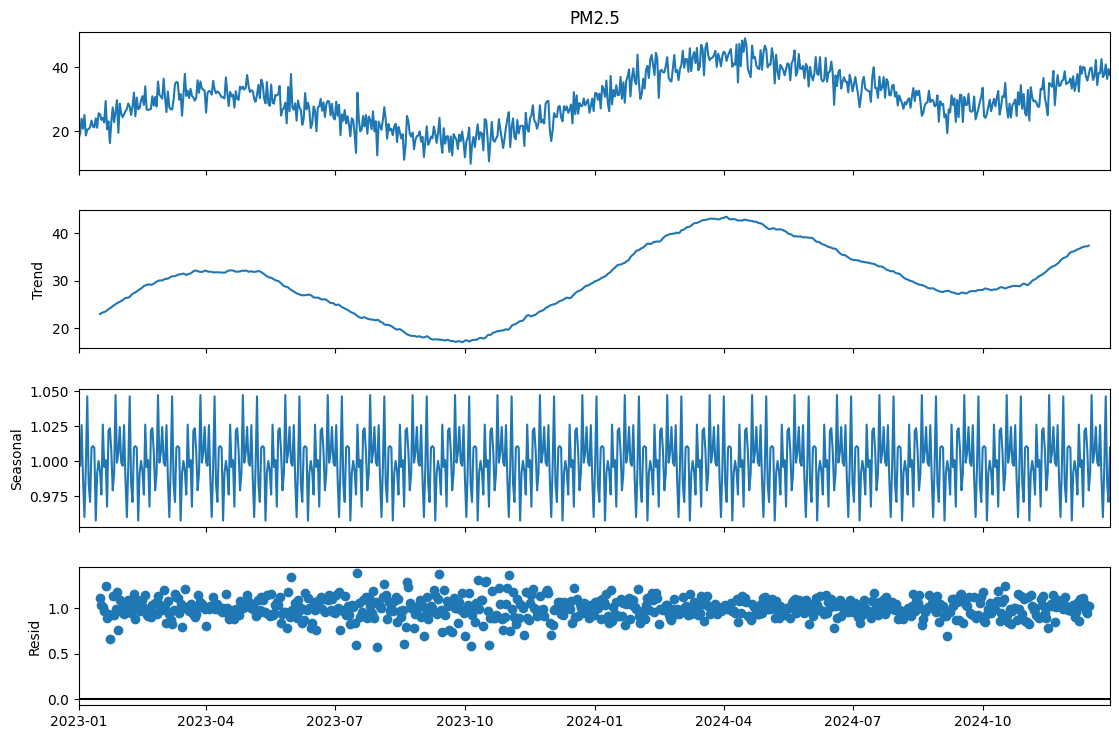

In [ ]:
fechas = pd.date_range(start="2023-01-01", periods=730, freq="D")

# Tendencia creciente simulada
tendencia = np.linspace(20, 40, 730)

# Estacionalidad anual (patrón senoidal)
estacionalidad = 10 * np.sin(2 * np.pi * fechas.dayofyear / 365)

# Ruido aleatorio
ruido = np.random.normal(0, 3, 730)

# Serie de PM2.5
pm25 = tendencia + estacionalidad + ruido

# DataFrame con índice de fechas
df = pd.DataFrame({"Fecha": fechas, "PM2.5": pm25})
df.set_index("Fecha", inplace=True)

# --- Descomposición de la serie ---
descomposicion = seasonal_decompose(df["PM2.5"], model="multiplicative", period=30)

# --- Graficar los componentes ---
fig = descomposicion.plot()
fig.set_size_inches(12, 8)
plt.show()